In [2]:
import numpy as np
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,plot_confusion_matrix

C:\Users\joeyh\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
test = pd.read_csv('C:\\Users\\joeyh\\Desktop\\Data\\NLP\\Test.csv')
train = pd.read_csv('C:\\Users\\joeyh\\Desktop\\Data\\NLP\\Train.csv')

In [4]:
train.head(2)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
train_df_1 = train
test_df_1 = test

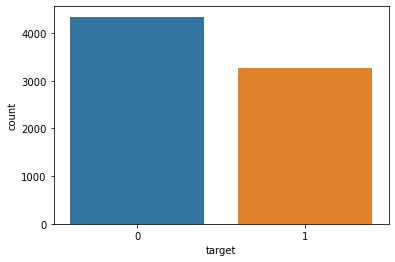

In [7]:
sns.countplot(train_df_1.target)

In [8]:
#coverting to a vector based on frequency
vector = CountVectorizer()
#scaling training data
X = vector.fit_transform(train_df_1.text)
#dependent variable
Y = train_df_1.target.values
P = vector.transform(test_df_1.text)

In [9]:
#splitting arrays into train and test subsets/ random_state controls shuffling
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=101)

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       892
           1       0.78      0.71      0.74       631

    accuracy                           0.80      1523
   macro avg       0.79      0.78      0.79      1523
weighted avg       0.80      0.80      0.79      1523



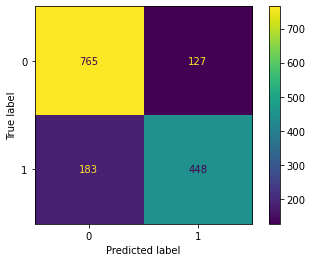

In [12]:
#trying naive bayes
mnb = MultinomialNB()
model_mnb = mnb.fit(xtrain,ytrain)
ts_pred_mnb = model_mnb.predict(xtest)
print(classification_report(ytest,ts_pred_mnb))

plot_confusion_matrix(mnb,xtest,ytest)

In [11]:
predict = pd.DataFrame(model_mnb.predict(P),columns = ['Target'])
submission_1 = test.join(predict)[['id','Target']]
submission_1.head()
submission_1.to_csv('submission1.cvs',index=False)